In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/train.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


# Analysing the dataset

In [3]:
df.shape

(45211, 11)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [5]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [6]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [7]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [8]:
#for the basic statistical analysis of the given dataset
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [9]:
#analysing the targets value count
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Data Cleaning

In [10]:
#checking the missing values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [11]:
df.duplicated().sum()

6

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df['target'] = df['y'].map({'yes':1,'no':0})

<ipython-input-14-6fe391ca84fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['y'].map({'yes':1,'no':0})


In [15]:
df = df.drop('y',axis = 1) #by droping y column we can focus on target column which is easy to work with after changing the values to numeric
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


# Data Visualisation

In [16]:
#Data Visualizaion gives the clear insight of data and better understaing of features and their relationship with target
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
pip install seaborn==0.11

<ipython-input-18-86702ba21926>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, fmt = '.1f', cmap='RdPu')


<Axes: >

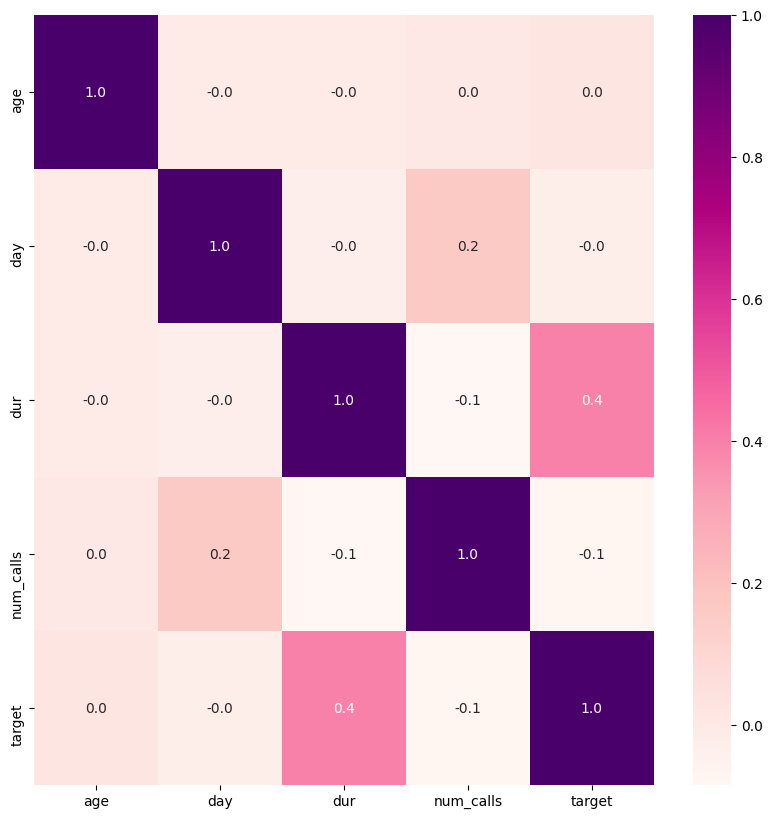

In [18]:
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt = '.1f', cmap='RdPu')

# Feature Distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

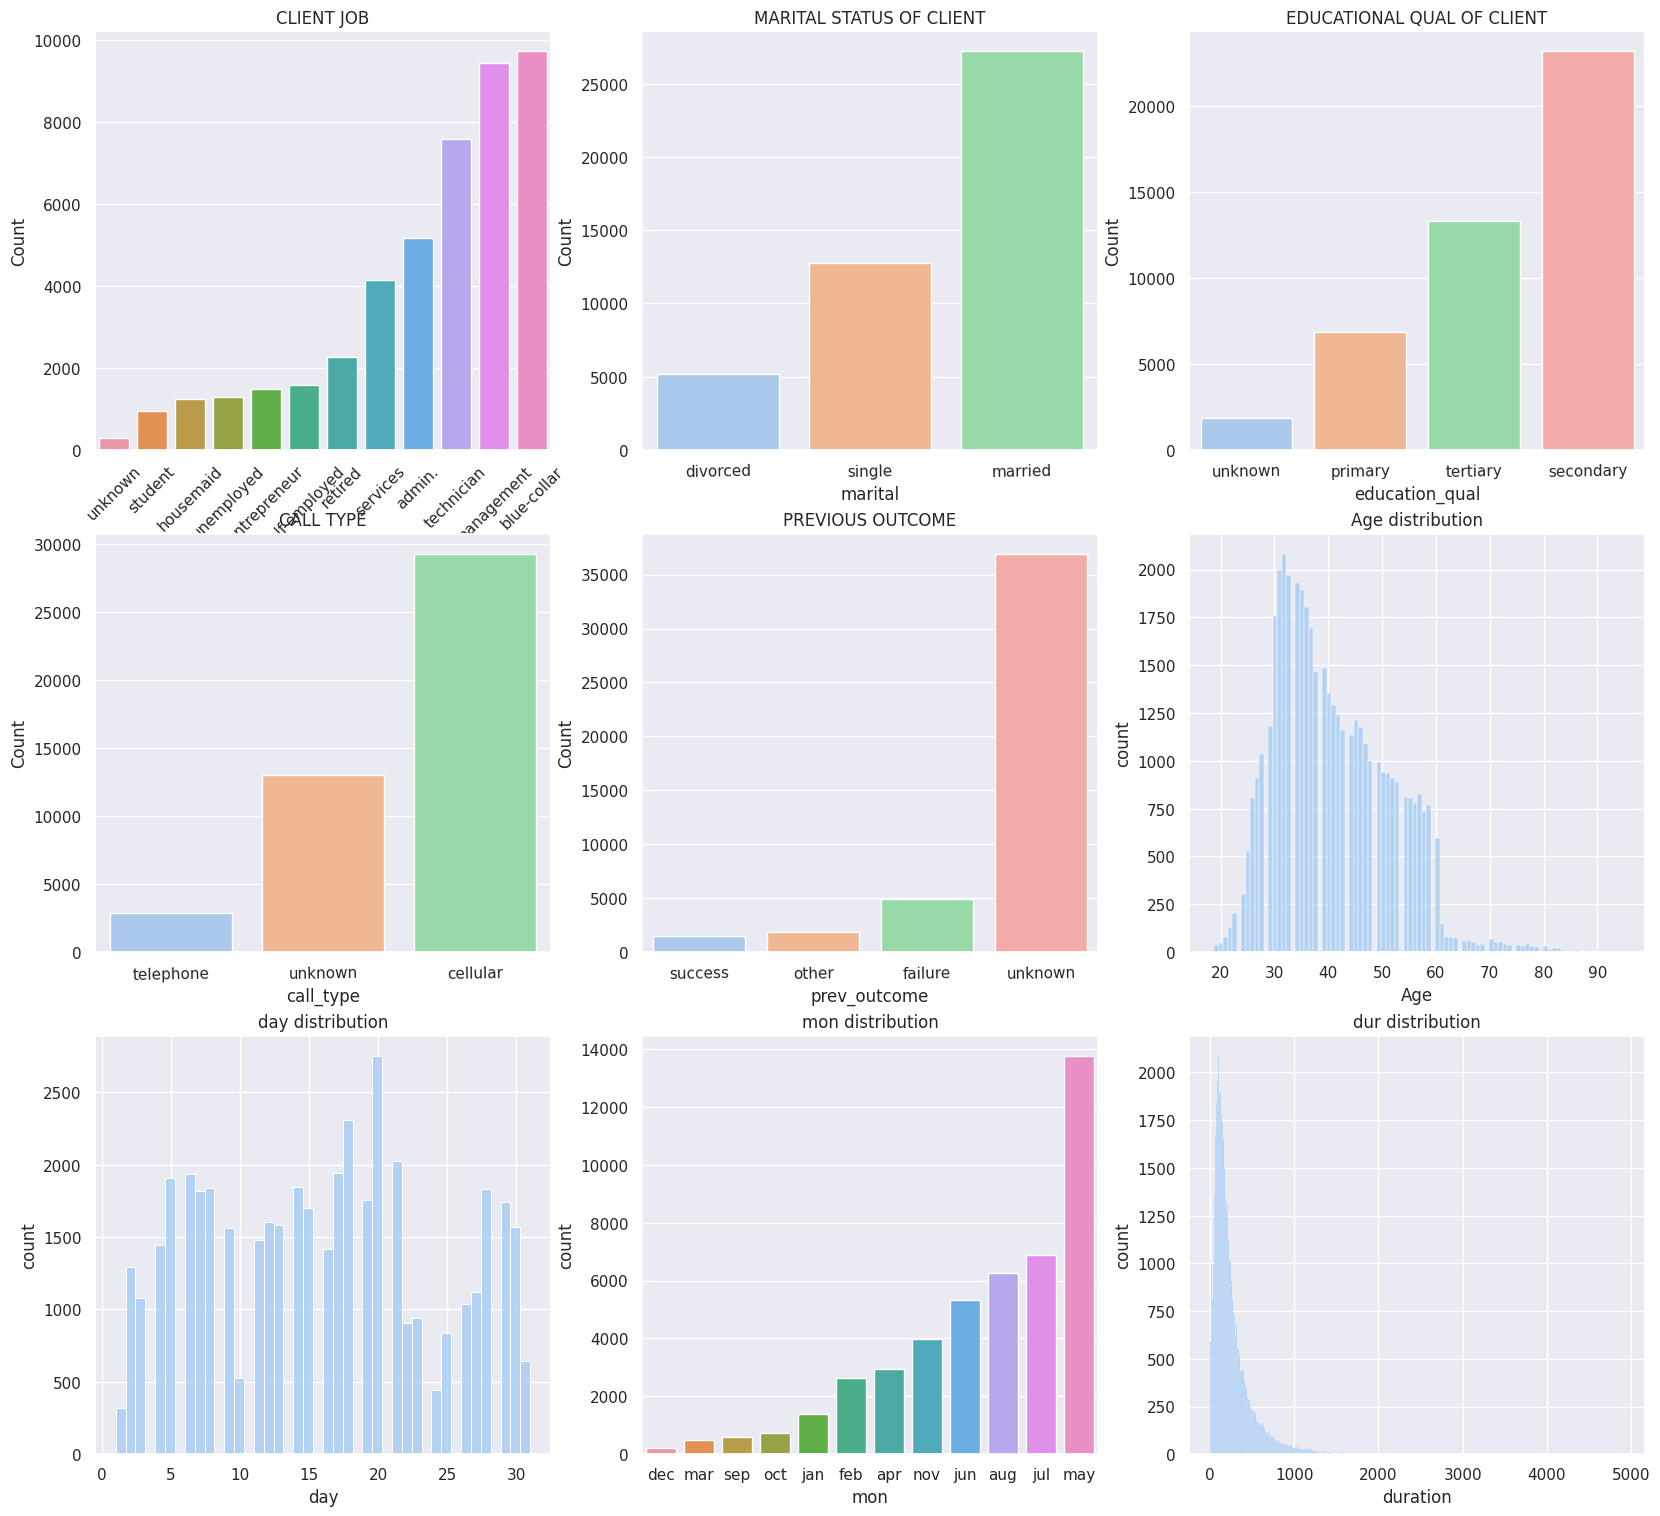

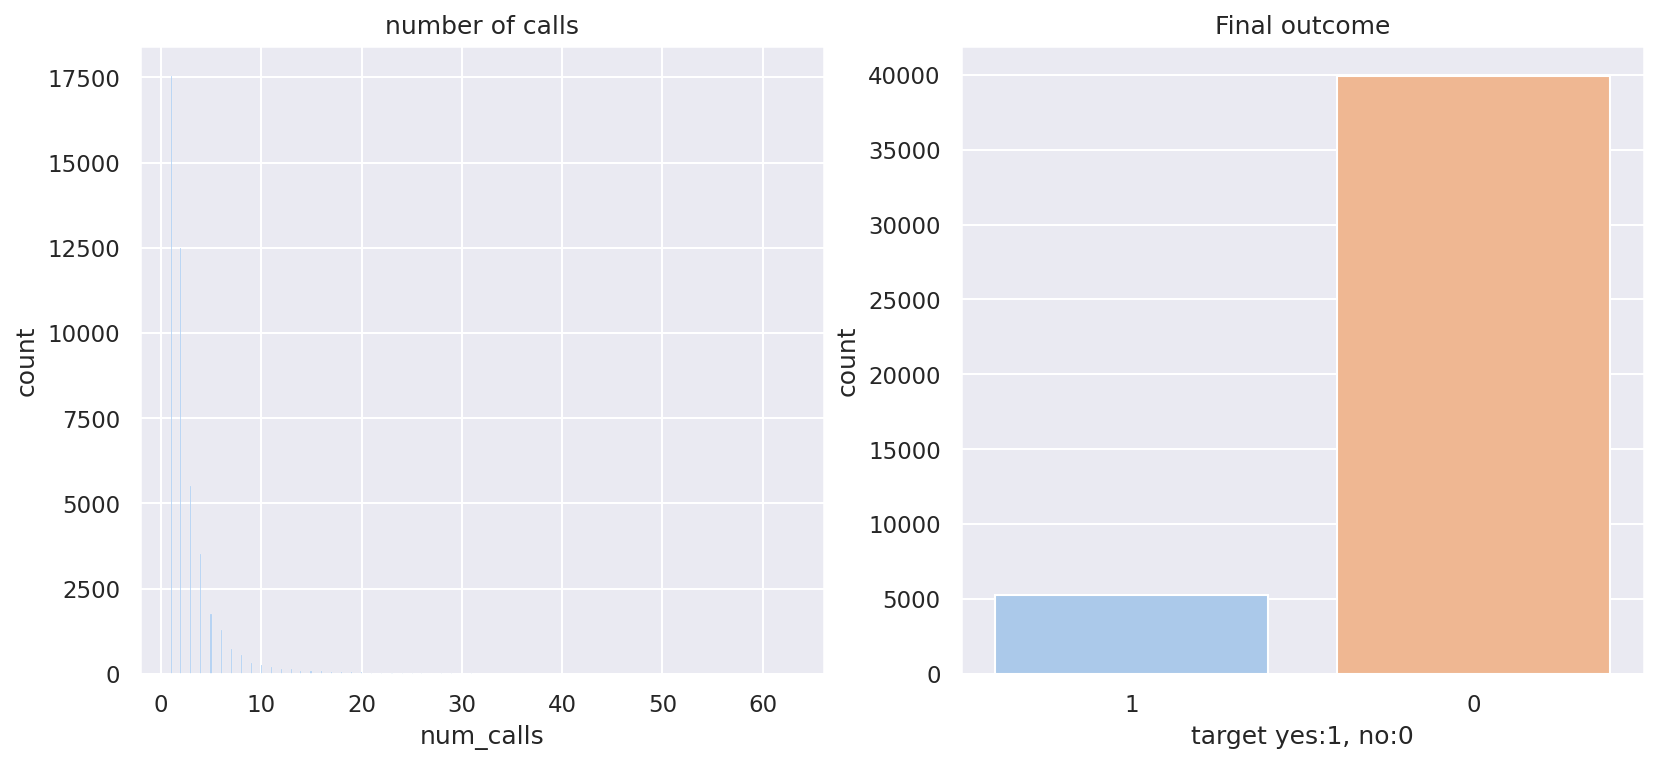

In [19]:
sns.set_theme(style='darkgrid',palette='pastel')


plt.figure(figsize=(20,25))

#job distribution
plt.subplot(431)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=45)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('CLIENT JOB')

#marital status distribution
plt.subplot(432)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=1)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('MARITAL STATUS OF CLIENT')

#educational qualification distribution
plt.subplot(433)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=1)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('EDUCATIONAL QUAL OF CLIENT')

#call type distribution
plt.subplot(434)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=1)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('CALL TYPE')

#previous outcome distribution
plt.subplot(435)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=1)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('PREVIOUS OUTCOME')

#Age distribution
plt.subplot (436)
sns.histplot(df.age)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('count')

#day distribution
plt.subplot(437)
sns.histplot(df.day)
plt.title('day distribution')
plt.xlabel('day')
plt.ylabel('count')

#month distribution
plt.subplot(438)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.title('mon distribution')
plt.xlabel('mon')
plt.ylabel('count')

#duration of calls
plt.subplot(439)
sns.histplot(df.dur)
plt.title('dur distribution')
plt.xlabel('duration')
plt.ylabel('count')

#number of calls
plt.figure(figsize=(20,25),dpi=150)
plt.subplot(4,3,10)
sns.histplot(df['num_calls'])
plt.title('number of calls')
plt.xlabel('num_calls')
plt.ylabel('count')

#target value
plt.subplot(4,3,11)
sns.countplot(df['target'],order=df['target'].value_counts().index[::-1])
plt.title('Final outcome')
plt.xlabel('target yes:1, no:0')
plt.ylabel('count')

plt.show()

# Detecting & remove outliers using box plot

<Axes: xlabel='age'>

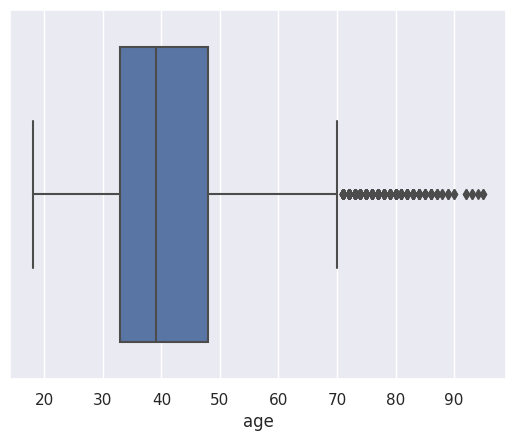

In [20]:
#for age column
sns.set(style='darkgrid')
sns.boxplot(x=df['age'])

In [21]:
q1,q3 = np.percentile(df['age'],[25,75])
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
print('upper age bound:',upper,'lower age bound:',lower)

upper age bound: 70.5 lower age bound: 10.5


In [22]:
#using th clip method I can easily set the specific range for age to avoid outliers rather than delete the outliers
df.age = df.age.clip(10.5,70.5)

<Axes: xlabel='age'>

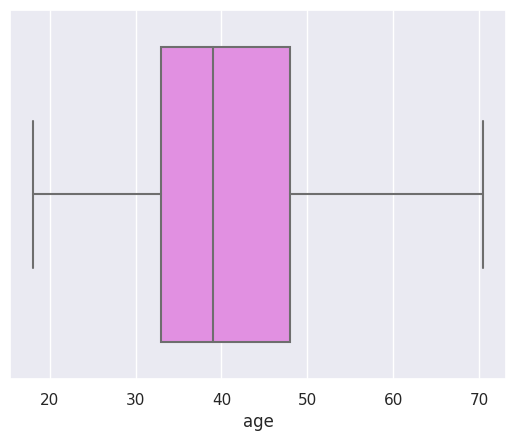

In [23]:
sns.set(style = 'darkgrid')
sns.boxplot(x=df['age'],color = 'violet')

<Axes: xlabel='day'>

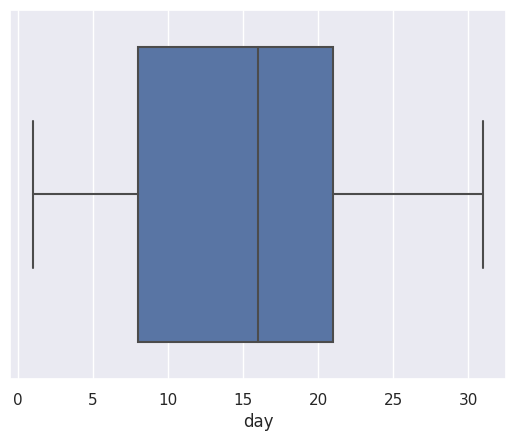

In [24]:
#for day column
sns.boxplot(x=df['day']) #day has no outliers so keep it as it is

<Axes: xlabel='dur'>

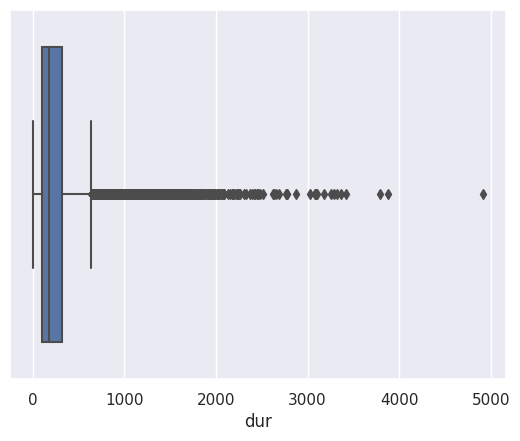

In [25]:
#for duration column
sns.boxplot(x=df['dur'])

In [26]:
q1,q3 = np.percentile(df['dur'],[25,75])
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
print('upper_bound:',upper,'lower_bound:',lower)

upper_bound: 643.0 lower_bound: -221.0


In [27]:
df.dur = df.dur.clip(-221.0,643.0)

<Axes: xlabel='dur'>

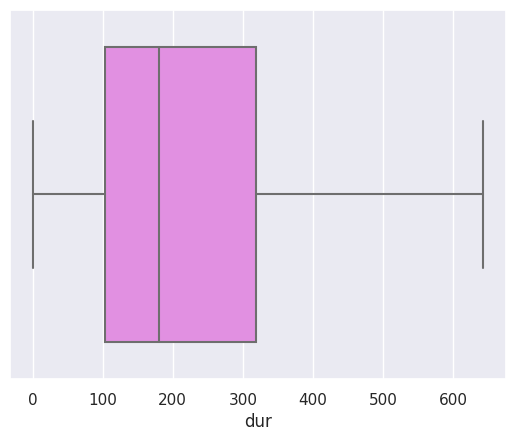

In [28]:
sns.boxplot(x=df['dur'],color = 'violet')

<Axes: xlabel='num_calls'>

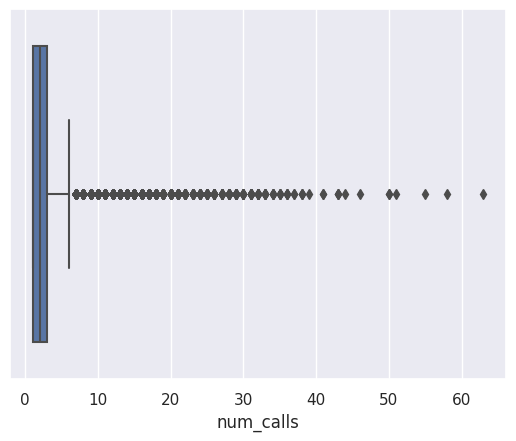

In [29]:
#For number of calls column
sns.boxplot(x=df['num_calls'])

In [30]:
q1,q3 = np.percentile(df['num_calls'],[25,75])
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
print('upper_bound:',upper,'lower_bound:',lower)

upper_bound: 6.0 lower_bound: -2.0


In [31]:
df.num_calls = df.num_calls.clip(-2.0,6.0)

<Axes: xlabel='num_calls'>

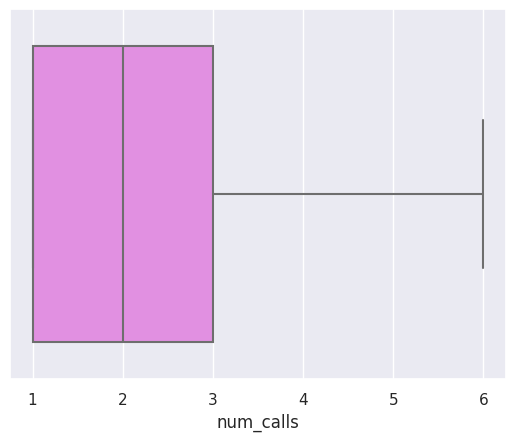

In [32]:
sns.boxplot(x=df['num_calls'],color = 'violet')

# Feature vs Target

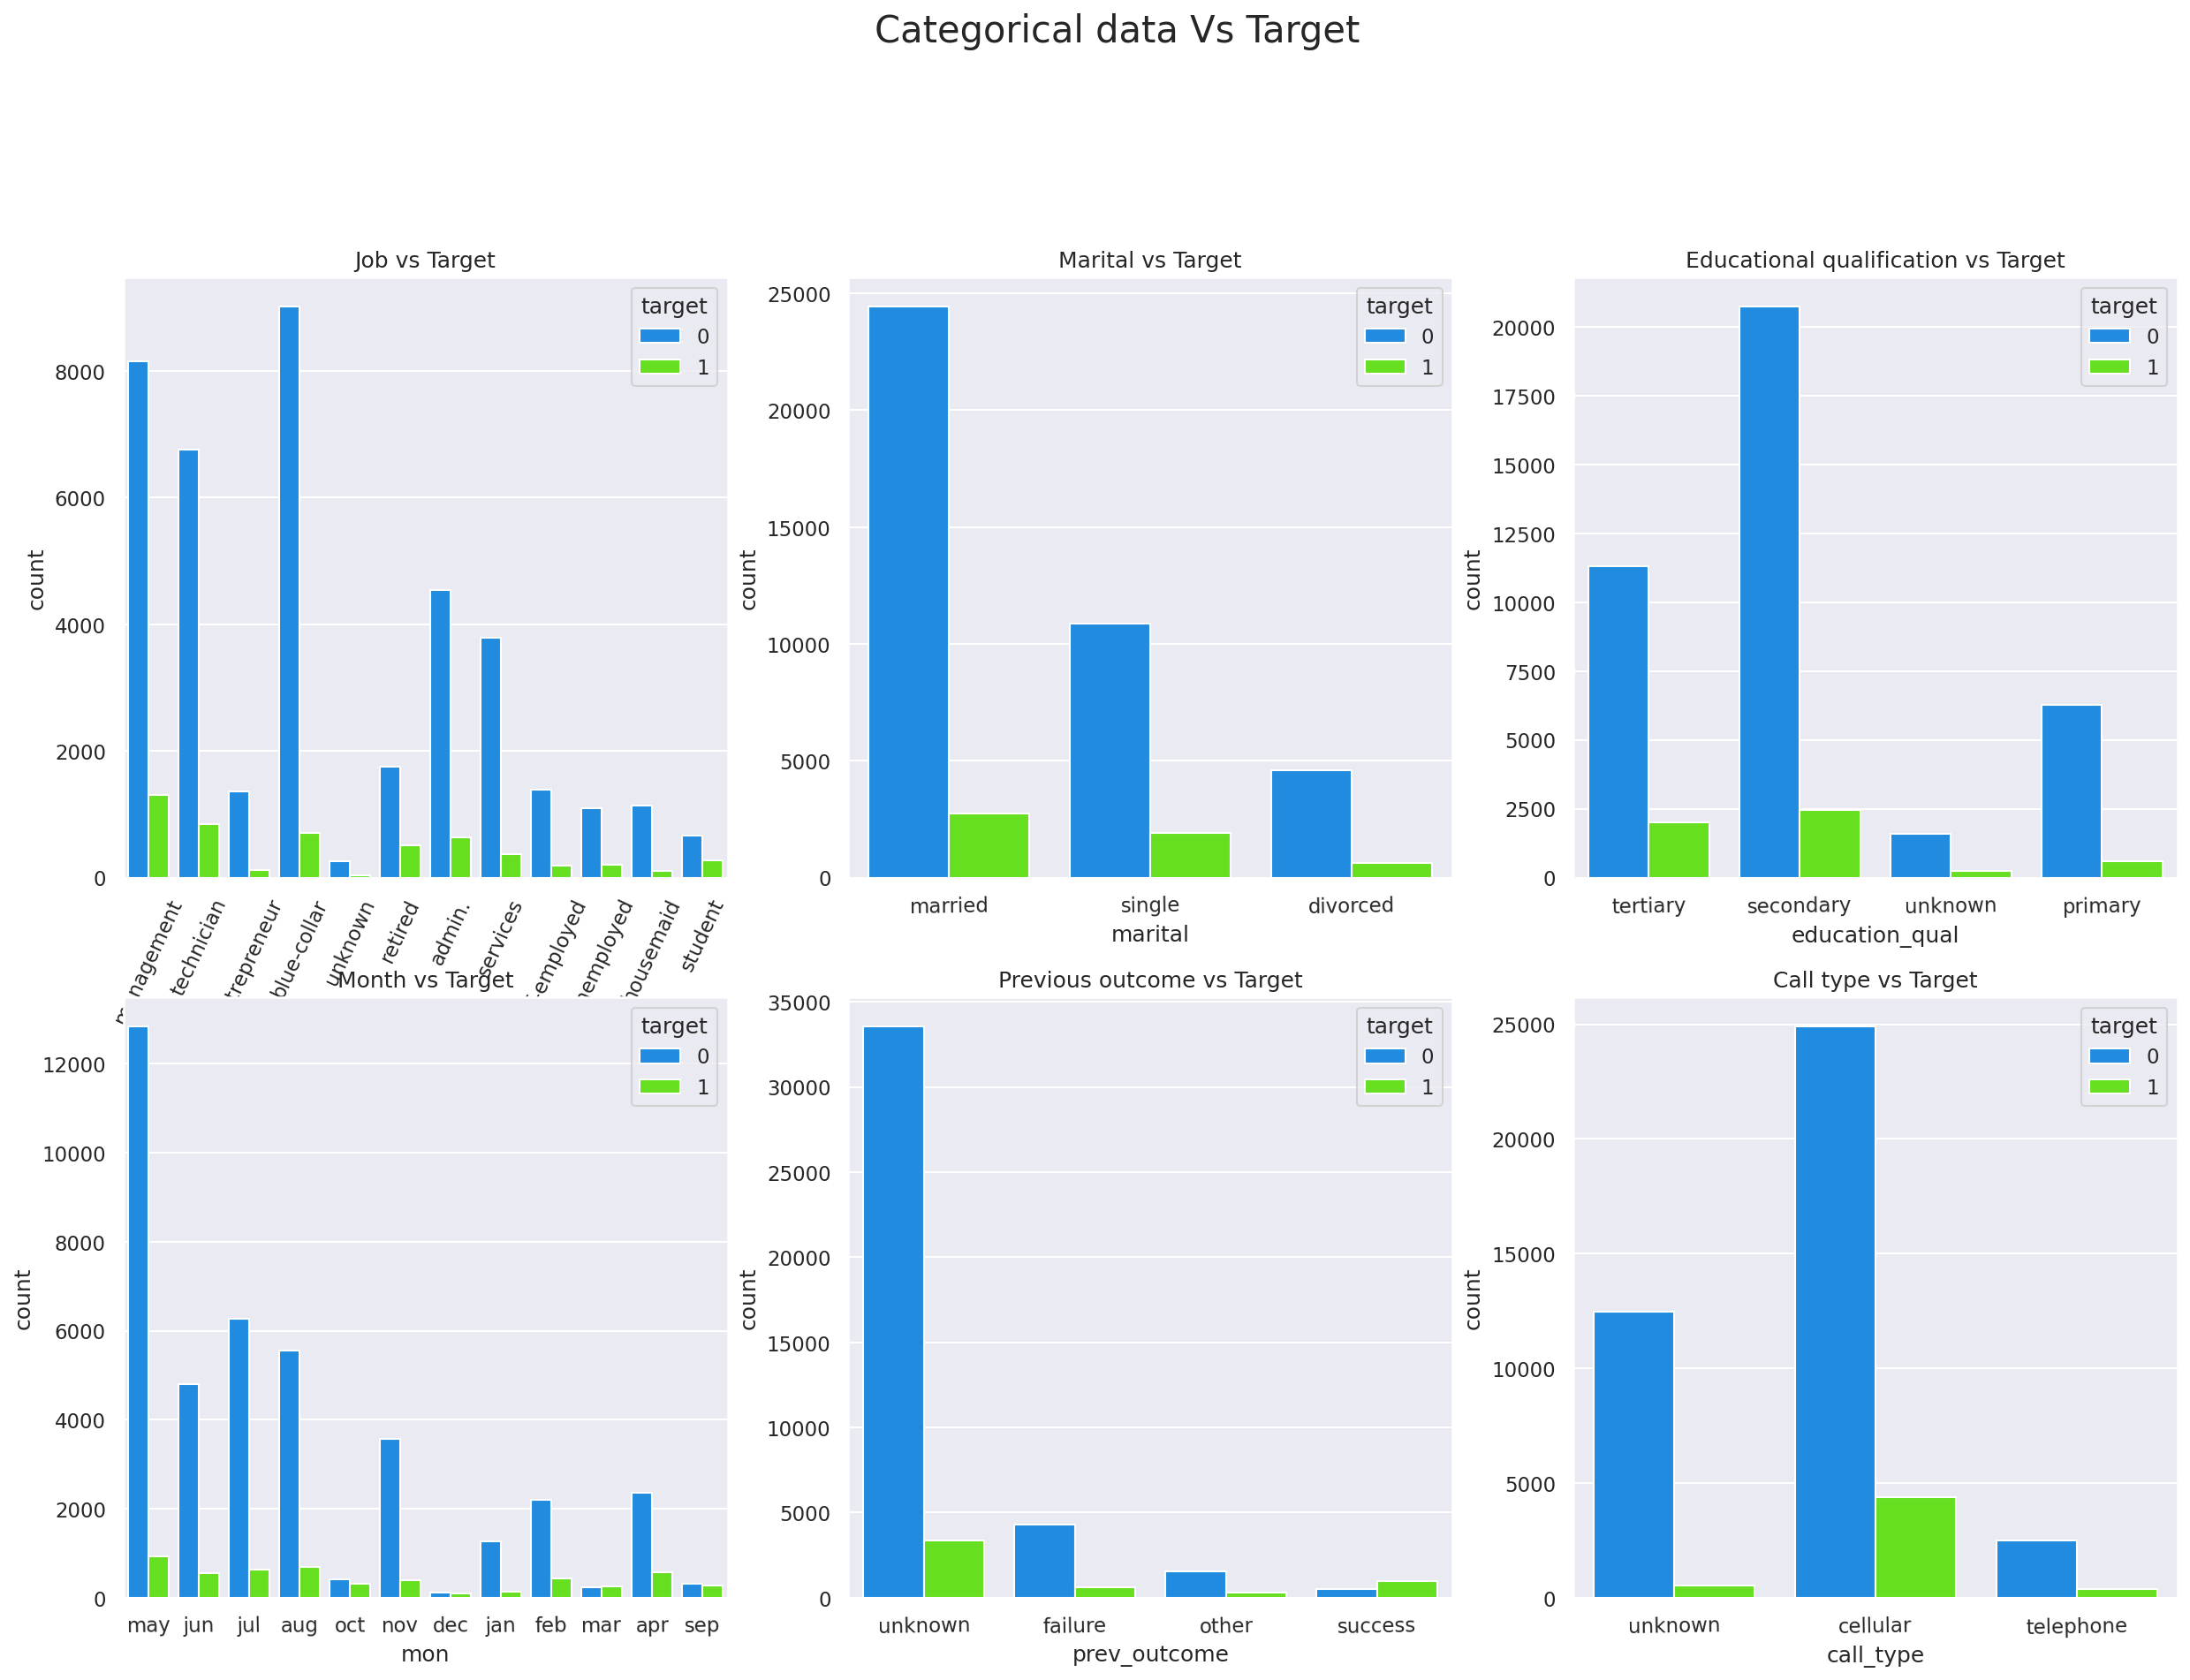

In [33]:
#categorical column

plt.figure(figsize = (20,20),dpi = 150)
plt.subplot(331)
sns.countplot(x='job',hue= 'target',data = df, palette ='gist_rainbow_r',color = 'darkgrid')
plt.xticks(rotation = 65)
plt.title('Job vs Target')

plt.subplot(332)
sns.countplot(x='marital',hue= 'target',data = df, palette ='gist_rainbow_r',color = 'darkgrid')
plt.xticks(rotation = 1)
plt.title('Marital vs Target')

plt.subplot(333)
sns.countplot(x='education_qual',hue= 'target',data = df, palette ='gist_rainbow_r',color = 'darkgrid')
plt.xticks(rotation = 1)
plt.title('Educational qualification vs Target')

plt.subplot(334)
sns.countplot(x='mon',hue= 'target',data = df, palette ='gist_rainbow_r',color = 'darkgrid')
plt.xticks(rotation = 1)
plt.title('Month vs Target')

plt.subplot(335)
sns.countplot(x='prev_outcome',hue= 'target',data = df, palette ='gist_rainbow_r',color = 'darkgrid')
plt.xticks(rotation = 1)
plt.title('Previous outcome vs Target')

plt.subplot(336)
sns.countplot(x='call_type',hue= 'target',data = df, palette ='gist_rainbow_r',color = 'darkgrid')
plt.xticks(rotation = 1)
plt.title('Call type vs Target')

plt.suptitle("Categorical data Vs Target",fontsize = 20)
plt.show()

##From analysing the categorical column
1.Job vs target


*   No - Bluecollar
*   Yes - Management
2.Marital vs target


*   No - Married
*   Yes - Married
3.Education vs target


*   No - Secondary
*  Yes - Secondary
4.Month vs target


*   No - may
* Yes - may
5.Previous outcome vs target


*   No - unknown
*   Yes- unknown
6.Call type vs target


* No- cellular
*   Yes- cellular


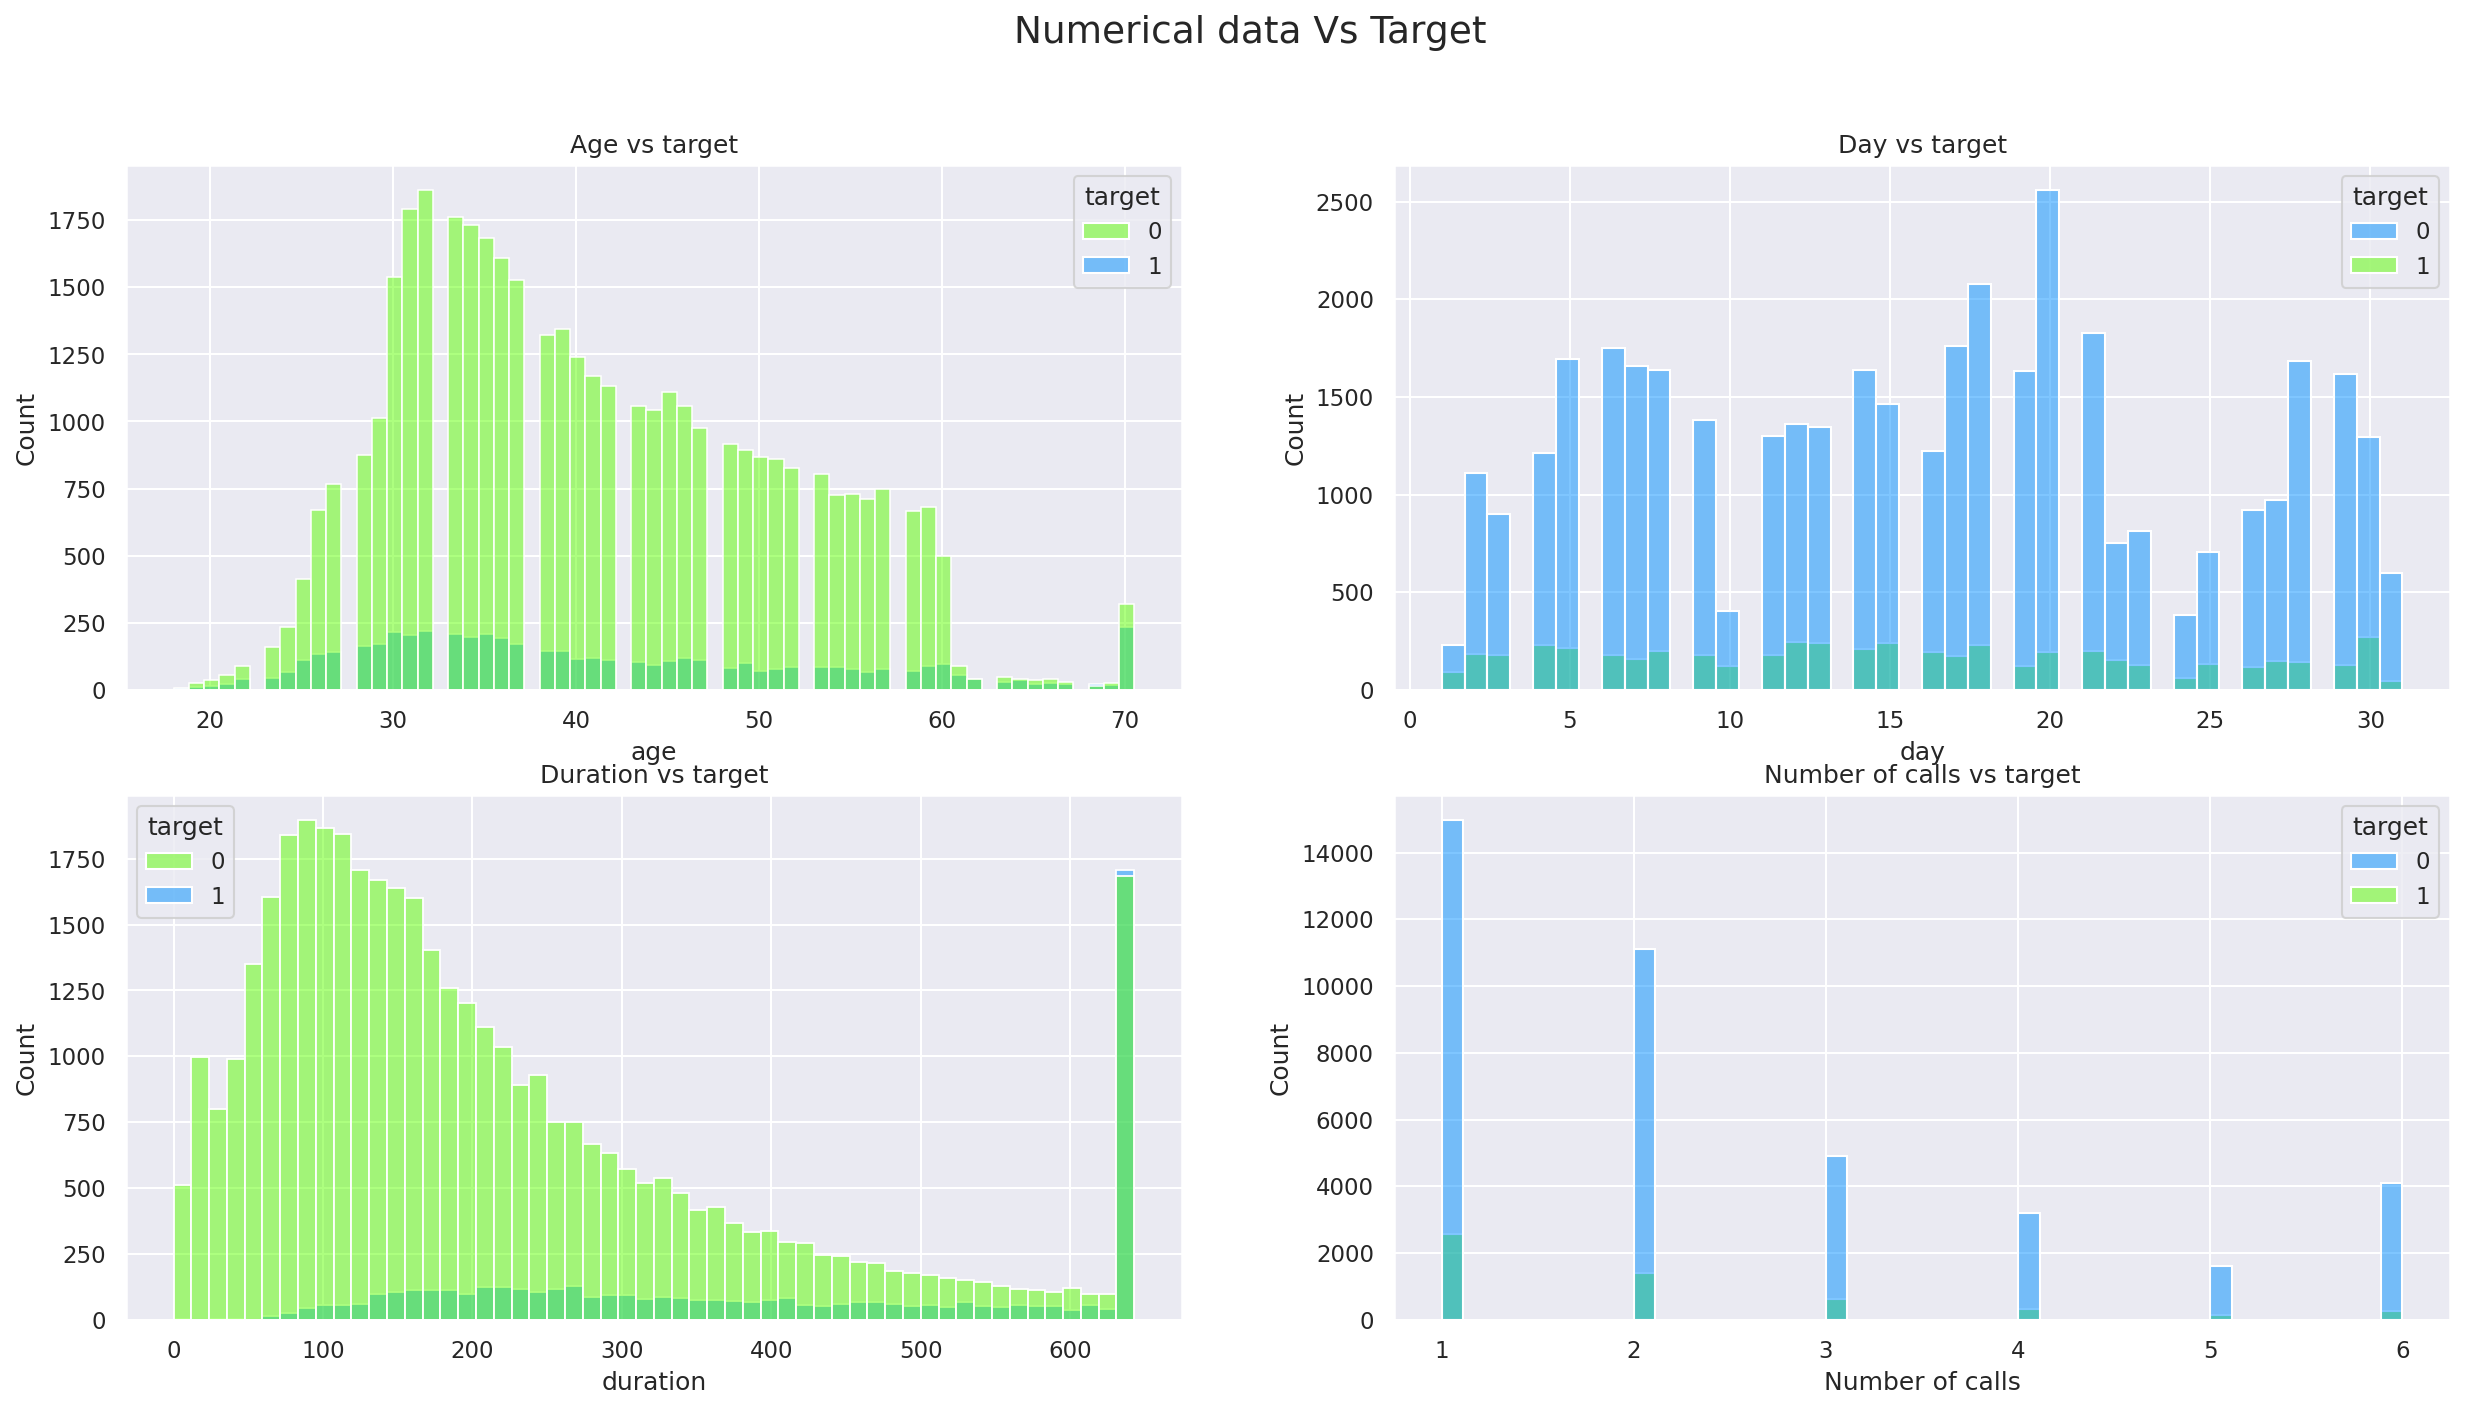

In [34]:
#numerical column

plt.figure(figsize= (20,10), dpi = 150)
plt.subplot(221)
sns.histplot(x = 'age',hue = 'target',data = df,palette ='gist_rainbow',color = 'darkgrid' )
plt.xlabel('age')
plt.title('Age vs target')

plt.subplot(222)
sns.histplot(x = 'day',hue = 'target',data = df,palette ='gist_rainbow_r',color = 'darkgrid')
plt.xlabel('day')
plt.title('Day vs target')

plt.subplot(223)
sns.histplot(x = 'dur',hue = 'target',data = df,palette ='gist_rainbow',color = 'darkgrid')
plt.xlabel('duration')
plt.title('Duration vs target')

plt.subplot(224)
sns.histplot(x = 'num_calls',hue = 'target',data = df,palette ='gist_rainbow_r',color = 'darkgrid')
plt.xlabel('Number of calls')
plt.title('Number of calls vs target')

plt.suptitle("Numerical data Vs Target", fontsize=18)
plt.show()
#Yes - 1 , NO - 0

##From analysing the categorical column
1.Age vs target - Middle aged people (30 - 40)



2.Day vs target - 5 to 20 (mid of days)



3.Duration vs target - More duration more conversion


4.Number of calls vs target - 2 to 3 calls




#Encoding

In [35]:
n_df = df.copy()

In [36]:
#using one-hot encoding I convert the categorical variable into numerical format
n_df = pd.get_dummies(n_df,columns = ['job'],drop_first = True)
n_df = pd.get_dummies(n_df,columns = ['prev_outcome'],drop_first = True)

In [37]:
#map the month
month_mapping = {'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,'mar':3, 'apr':4, 'sep':9}
n_df['mon'] = n_df['mon'].map(month_mapping)

In [38]:
n_df['marital'] = n_df['marital'].map({'divorced': 0,'single':1,'married':2})
n_df['education_qual'] = n_df['education_qual'].map({'unknown': 0,'primary':1,'secondary':2,'tertiary':3})
n_df['call_type'] = n_df['call_type'].map({'unknown': 0,'telephone':1,'cellular':2})


In [39]:
#using drop I make target value as y and others as x
x = n_df.drop('target',axis = 1)
y = n_df['target']

# Spliting, Balancing and Scaling the data

In [40]:
x = n_df.drop('target', axis = 1)
y = n_df['target']

In [41]:
#spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [42]:
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(36164, 22) (9041, 22) (36164,) (9041,)


In [43]:
#balancing
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy = 'all')
x_train, y_train = smt.fit_resample(x_train, y_train)

In [44]:
print(len(x_train))
print(len(y_train))

53549
53549


In [45]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Machine Learning Model

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression

In [47]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [48]:
log_score = accuracy_score(y_test, y_pred)
log_score

0.7957084393319324

# Decision Tree

In [56]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train, y_train)
    val_accuracy = cross_val_score(dt, x_test, y_test, cv=10).mean()
    print("Depth:", depth, " Cross-validated Accuracy:", val_accuracy)

Depth: 1  Cross-validated Accuracy: 0.8795487214589548
Depth: 2  Cross-validated Accuracy: 0.8889513763262112
Depth: 3  Cross-validated Accuracy: 0.8907210433677213
Depth: 4  Cross-validated Accuracy: 0.8943708746883099
Depth: 5  Cross-validated Accuracy: 0.8912735295555665
Depth: 6  Cross-validated Accuracy: 0.8903886960348115
Depth: 7  Cross-validated Accuracy: 0.8886190289933017
Depth: 8  Cross-validated Accuracy: 0.8866276340879088
Depth: 9  Cross-validated Accuracy: 0.8857431672615265
Depth: 10  Cross-validated Accuracy: 0.8850785948271648
Depth: 20  Cross-validated Accuracy: 0.8690423165305823


Depth - 4 has the best cross validation accuracy - 0.8943

# Random Forest

In [57]:
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")  #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, max_features="sqrt")
    val_accuracy = cross_val_score(rf, x_train, y_train, cv=10).mean()
    print("Depth:", depth, "Cross-validated Accuracy:", val_accuracy)

Depth: 1 Cross-validated Accuracy: 0.7880636762238205
Depth: 2 Cross-validated Accuracy: 0.8499694252000388
Depth: 3 Cross-validated Accuracy: 0.8779063830737126
Depth: 4 Cross-validated Accuracy: 0.8934995136144359
Depth: 5 Cross-validated Accuracy: 0.9037891720005147
Depth: 6 Cross-validated Accuracy: 0.9126409463050565
Depth: 7 Cross-validated Accuracy: 0.9180192022021112
Depth: 8 Cross-validated Accuracy: 0.9233227406265707
Depth: 9 Cross-validated Accuracy: 0.9280287555191421
Depth: 10 Cross-validated Accuracy: 0.9317449888684151


Depth - 10 has the best cross validation accuracy - 0.9317

# KNN

In [59]:
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]:
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    train_score = knn.score(x_train, y_train)
    cross_val_accuracy = np.mean(cross_val_score(knn, x_test, y_test, cv=10))
    print("K value:", i, "Train Score:", train_score, "Cross-validated Accuracy:", cross_val_accuracy)


K value: 1 Train Score: 1.0 Cross-validated Accuracy: 0.8666086882119982
K value: 2 Train Score: 0.9731834394666568 Cross-validated Accuracy: 0.8848580892778566
K value: 3 Train Score: 0.9632672879045361 Cross-validated Accuracy: 0.8840837529946708
K value: 4 Train Score: 0.9572914526881922 Cross-validated Accuracy: 0.8854113088544467
K value: 5 Train Score: 0.9530710190666493 Cross-validated Accuracy: 0.8851894587591064
K value: 6 Train Score: 0.9500457524883751 Cross-validated Accuracy: 0.8865172590817973
K value: 7 Train Score: 0.9477114418569907 Cross-validated Accuracy: 0.8868494841832495
K value: 8 Train Score: 0.9453771312256064 Cross-validated Accuracy: 0.8874019703710948
K value: 9 Train Score: 0.9445741283684103 Cross-validated Accuracy: 0.886628123013739
K value: 10 Train Score: 0.9426133074380474 Cross-validated Accuracy: 0.889614481983083
K value: 20 Train Score: 0.9328839007264375 Cross-validated Accuracy: 0.8881766733486529
K value: 30 Train Score: 0.9277110683672898 Cro


k - 10 has the best cross validation accuracy - 0.896

# XGboost

In [68]:
learning_rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.5, 0.7, 1]

for lr in learning_rates:
    model = xgb.XGBClassifier(learning_rate=lr, n_estimators=100, verbosity=0)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    cross_val_mean_score = np.mean(cross_val_score(model, x_test, y_test, cv=10))
    print("Learning rate:", lr, "Train Score:", train_score, "Cross-validated Accuracy:", cross_val_mean_score)

Learning rate: 0.01 Train Score: 0.9194756204597658 Cross-validated Accuracy: 0.892600963183885
Learning rate: 0.02 Train Score: 0.9315953612579133 Cross-validated Accuracy: 0.8926004742580551
Learning rate: 0.03 Train Score: 0.9386356421221684 Cross-validated Accuracy: 0.8942600107563683
Learning rate: 0.04 Train Score: 0.9445741283684103 Cross-validated Accuracy: 0.8951444775827506
Learning rate: 0.05 Train Score: 0.9491120282358214 Cross-validated Accuracy: 0.8974671197379358
Learning rate: 0.1 Train Score: 0.9611757455788157 Cross-validated Accuracy: 0.8986839338972278
Learning rate: 0.11 Train Score: 0.9623522381370334 Cross-validated Accuracy: 0.8996791424240943
Learning rate: 0.12 Train Score: 0.9644251059777027 Cross-validated Accuracy: 0.8982408448638342
Learning rate: 0.13 Train Score: 0.9656762964761246 Cross-validated Accuracy: 0.9008959565833863
Learning rate: 0.14 Train Score: 0.9672823021905171 Cross-validated Accuracy: 0.899347650711387
Learning rate: 0.15 Train Score: 

Learning Rate - 0.13 has the best cross validation accuracy - 0.9008

# Result

In [75]:
Best_cross_val_acc = {'Model':['Logestic Regression','Decision Tree','Random Forest','KNN','XGboost'],'Cross Val Score':[0.7957,0.8943,0.9317,0.896,0.9008]}
data = pd.DataFrame(Best_cross_val_acc)
df = pd.DataFrame(data)
df_sorted = df.sort_values(by='Cross Val Score', ascending=False)
df_sorted = df_sorted.reset_index(drop=True)
print(df_sorted)

                 Model  Cross Val Score
0        Random Forest           0.9317
1              XGboost           0.9008
2                  KNN           0.8960
3        Decision Tree           0.8943
4  Logestic Regression           0.7957


Result: Random Forest has the best Cross Validation Accuracy of all models, Hence Random forest is the Best Model for Customer Conversion Prediciton for Inscurance